In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/walkerfinlay/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Building a simulator in 2D

In [14]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [15]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy

In [16]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = -sin(t)
    uy = cos(t)
    return array([ux, uy])

### Rectangle Control Policy  


In [17]:
def rcontrol(t, y):
    if (t < .8):
        ux = 0
        uy = 1
        return array([ux, uy])
    if (t >= .8 and t < 1.6):
        ux = -1
        uy = 0
        return array([ux, uy])
    if (t >= 1.6 and t < 2.4):
        ux = 0
        uy = -1
        return array([ux, uy])
    ux = 1
    uy = 0
    return array([ux, uy])

### Ellipse Control Policy

In [18]:
def econtrol(t, y):
    ux = -sin(2*t)
    uy = cos(2*t)
    return array([ux, uy])

### Translated Ellipse

In [19]:
def eecontrol(t, y):
    ux = -4*sin(t)*cos(pi/6)-2*cos(t)*sin(pi/6)
    uy = -4*sin(t)*sin(pi/6)+2*cos(t)*cos(pi/6)
    return array([ux, uy])

### Running the simulator

In [20]:
tf = 2*pi
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt))  # Time interval


# Initial conditions
init_x = 4*cos(0)*cos(pi/6)-2*sin(0)*sin(pi/6)+3
init_y = 4*cos(0)*sin(pi/6)+2*sin(0)*cos(pi/6)+2
x = array([init_x, init_y])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = eecontrol(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

[[ 6.46410162  4.        ]
 [ 6.36410162  4.17320508]
 [ 6.22901339  4.32492795]
 [ 6.06026891  4.45356032]
 [ 5.8596569   4.55773864]
 [ 5.62930391  4.6363586 ]
 [ 5.37165173  4.68858681]
 [ 5.08943154  4.71386964]
 [ 4.78563494  4.71193909]
 [ 4.46348226  4.68281561]
 [ 4.12638839  4.62680792]
 [ 3.77792661  4.54450972]
 [ 3.4217907   4.4367934 ]
 [ 3.0617558   4.30480076]
 [ 2.70163836  4.14993097]
 [ 2.34525571  3.97382568]
 [ 1.9963856   3.77835166]
 [ 1.65872615  3.56558097]
 [ 1.33585662  3.33776904]
 [ 1.03119951  3.09733074]
 [ 0.74798426  2.84681476]
 [ 0.48921303  2.58887664]
 [ 0.25762885  2.32625059]
 [ 0.05568658  2.0617205 ]
 [-0.11447315  1.79809048]
 [-0.2510466   1.53815504]
 [-0.35258606  1.28466959]
 [-0.41801518  1.04032113]
 [-0.44664041  0.8076998 ]
 [-0.4381583   0.58927146]
 [-0.39265877  0.3873515 ]
 [-0.31062412  0.20408033]
 [-0.19292395  0.04140065]
 [-0.0408059  -0.09896308]
 [ 0.14411754 -0.21552297]
 [ 0.35988612 -0.30704346]
 [ 0.60421267 -0.37255441]
 

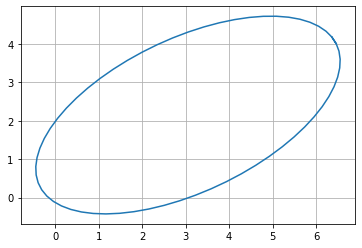

In [21]:
grid()
plot(x_log[:,0], x_log[:,1])

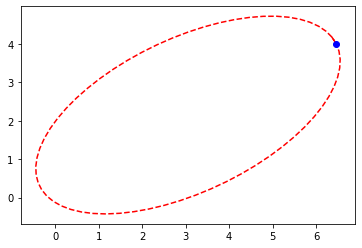

In [22]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())